In [45]:
# For data manipulation, data processing
import pandas as pd
from time import time

# Import sklearn models
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
# To calculate the accuracy of the trained classifier
from sklearn.metrics import accuracy_score
# To understand the trained classifier behavior
from sklearn.metrics import confusion_matrix
# For spliting data into training and testing sets
from sklearn.model_selection import train_test_split
# For Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# For Desicion Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [46]:
# print Header
print('---- Breast Cancer Sample Dataset ----')

# Read data in CSV file
dataset = pd.read_csv('E:\\4th Yr\\ML\\Assignmntz\\data.csv')
# INPUT_PATH = "..//Assignmntz//data.csv"
# dataset = pd.read_csv(INPUT_PATH)
# Display first 10 rows 
dataset.head(10)

---- Breast Cancer Sample Dataset ----


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [47]:
# No of cases included in the dataset, size of the dataframe
length = len(dataset)
print 'No of cases in the dataset ->', str(len(dataset))

# No of features in the dataset
print 'No of features in the dataset ->', dataset.shape[1]-1

No of cases in the dataset -> 569
No of features in the dataset -> 32


In [48]:
# Descriptive statistics for each column
print('---- Descriptive statistics For Breast Cancer Dataset ----')
dataset.describe()

---- Descriptive statistics For Breast Cancer Dataset ----


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [49]:
# Data Cleaning
dataset = dataset.drop(['id', 'Unnamed: 32'], axis = 1)
# dataset.drop('id',axis=1, inplace=True)
# dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [50]:
# Convert to array
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [51]:
# Preparing data
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# target(label) - value we want to predict
target = dataset['diagnosis']

# Remove the labels from the features
# Remove the factorial column 'diagnosis' to find the co-relation between numerical columns
features = dataset.drop('diagnosis', axis = 1)

# Saving features
new_features = list(features.columns)

features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
# Convert to array
target.unique()

array([1, 0], dtype=int64)

In [54]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [55]:
target.describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [56]:
# To split the dataset 
def split_data(features, target):
   
    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size= 0.3, random_state=101)
    
    print "Training Features Shape -> ", train_x.shape
    print "Training Labels Shape   -> ", train_y.shape
    print "Testing Features Shape  -> ", test_x.shape
    print "Testing Labels Shape    -> ", test_y.shape
    print("\n")
    
    return train_x, test_x, train_y, test_y

In [57]:
def random_forest_classifier(train_x, train_y):
    
    ran_forest = RandomForestClassifier(n_estimators=100)
#     Train the model on training data
    ran_forest.fit(train_x, train_y)    
#     print("1")
    print "Trained model -> \n", ran_forest
    
    return ran_forest

In [58]:
def main():
  
    # Train Test Split 
    split_data(features, target)   
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size= 0.3, random_state=101)
    
    # Using Decision Tree Model
    decs_tree = DecisionTreeClassifier()
    decs_tree.fit(train_x, train_y)    
    desc_pred = decs_tree.predict(test_x)
    
    print("---- Decision Tree Model -----\n")
    print " Classification Report -> \n"
    print(classification_report(test_y, desc_pred))
    print " Confusion Matrix -> "
    print(confusion_matrix(test_y, desc_pred))
    print("\n")    
    print("---- Random Forests -----\n")
        
#     Using Random Forests
    trained_model  = random_forest_classifier(train_x, train_y)    
    ran_forest = RandomForestClassifier(n_estimators=100)
#     Train the model on training data
    ran_forest.fit(train_x, train_y)
    
#     Perform predictions
    ran_pred = ran_forest.predict(test_x)
    print("\n")
    print " Classification Report -> \n"
    print(classification_report(test_y, ran_pred))
 
    for i in xrange(0, 5):
        print "Actual outcome -> {} and Predicted outcome -> {}" .format(list(test_y)[i], ran_pred[i]) 

#     Train and Test Accuracy
    print("\n")
    print " Train Accuracy -> ", accuracy_score(train_y, trained_model.predict(train_x))
    print " Test Accuracy  -> ", accuracy_score(test_y, ran_pred)
#     Confusion matrix
    print " Confusion Matrix -> "
    print(confusion_matrix(test_y, ran_pred))
    
if __name__ == "__main__":
    main()

Training Features Shape ->  (398, 30)
Training Labels Shape   ->  (398L,)
Testing Features Shape  ->  (171, 30)
Testing Labels Shape    ->  (171L,)


---- Decision Tree Model -----

 Classification Report -> 

             precision    recall  f1-score   support

          0       0.92      0.92      0.92       105
          1       0.88      0.88      0.88        66

avg / total       0.91      0.91      0.91       171

 Confusion Matrix -> 
[[97  8]
 [ 8 58]]


---- Random Forests -----

Trained model -> 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


 Classification Report -> 

             precision    recall  f

In [59]:
def predict_model(model, train_x, test_x, train_y, test_y, selected_cols):
    
#     Calculate Training Time
    t0 = time()
    model.fit(train_x[selected_cols], train_y)
    training_time = time() - t0
    
#    Calculate Prediction Time
    t1 = time()
    pred = model.predict(test_x[selected_cols])
    prediction_time = time() - t1
    
#     Calculate f1_score
    score = f1_score(test_y, pred)

    print "In Random Forest \n"
    print "  f1_score is -> " , score
    print '  Accuracy is -> ' , metrics.accuracy_score(test_y, pred)
    print "  cross_val_score is ->", (cross_val_score(model, features[selected_cols], target , cv = 10).mean())   
    print "  Time for training dataset -> ", training_time
    print "  Time for prediction -> ", prediction_time

In [60]:
Forest = RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1)

In [61]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size= 0.3, random_state=101)
predict_model(Forest, train_x, test_x, train_y, test_y, new_features)

In Random Forest 

  f1_score is ->  0.9206349206349207
  Accuracy is ->  0.9415204678362573
  cross_val_score is -> 0.954439979258491
  Time for training dataset ->  0.0820000171661
  Time for prediction ->  0.0


In [62]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y);

Variable: concave points_worst           Importance: 0.29
Variable: perimeter_worst                Importance: 0.21
Variable: concave points_mean            Importance: 0.16
Variable: area_worst                     Importance: 0.12
Variable: radius_worst                   Importance: 0.07
Variable: texture_worst                  Importance: 0.04
Variable: texture_mean                   Importance: 0.02
Variable: area_se                        Importance: 0.01
Variable: concavity_se                   Importance: 0.01
Variable: fractal_dimension_se           Importance: 0.01
Variable: smoothness_worst               Importance: 0.01
Variable: radius_mean                    Importance: 0.0
Variable: perimeter_mean                 Importance: 0.0
Variable: area_mean                      Importance: 0.0
Variable: smoothness_mean                Importance: 0.0
Variable: compactness_mean               Importance: 0.0
Variable: concavity_mean                 Importance: 0.0
Variable: symmetry_m

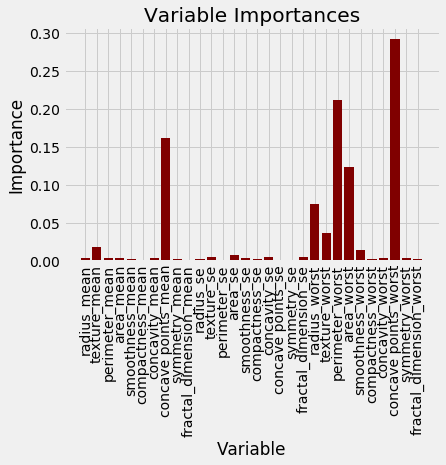

In [63]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(new_features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
     print 'Variable: {:30} Importance: {}'.format(*pair)

# Visualize the output in a bar chart 
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_val = list(range(len(importances)))
# Make a bar chart
plt.bar(x_val, importances, orientation = 'vertical' , color='maroon')
# Tick labels for x axis
barlist = plt.xticks(x_val, new_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');
       
# barlist = pyplot.bar(range(len(importance)), importance)
 # print (sorted(zip(map(lambda x: round(x, 4), importance), names), reverse=True))              

# Axis labels and title
pyplot.ylabel('Importance'); 
pyplot.xlabel('Variable'); 
pyplot.title('Variable Importances');
pyplot.show()

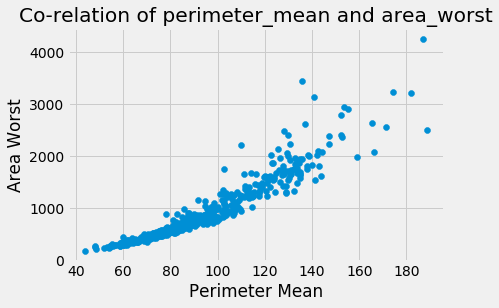

In [64]:
df = pd.DataFrame(dataset)

figure, graph = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    graph.scatter(x,y, label=str(i))
    
plt.ylabel('Area Worst'); 
plt.xlabel('Perimeter Mean'); 
plt.title('Co-relation of perimeter_mean and area_worst');
figure.savefig('relation.png')

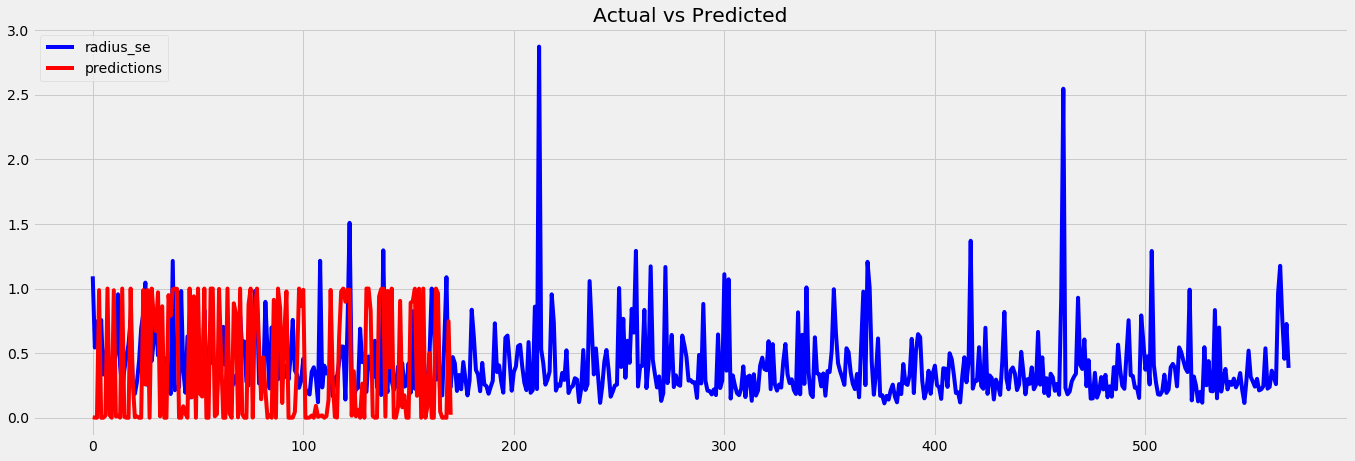

In [65]:
yTest = dataset['radius_se'].as_matrix()
# Use the random forest's predict method on the test data
predictions = rf.predict(test_x)

plt.figure(figsize=(21,7))
plt.plot(yTest,label='radius_se',color='blue')
plt.plot(predictions,label='predictions',color='red')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()